# The Relationship Between Economic Growth and Development and Education Quality

### 1. Introduction and Set-Up

To start off, we are importing a few libraries and packages to assist with data manipulation and visualisation. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
import os
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

from string import ascii_letters

Loading BokehJS ...

In this Kaggle dataset, the database that we are given to work with is an SQLite database. We need to first create a connection to the database. Once we have our connection set up, we can create a Cursor object to enable traversal over the records in the database. 

In [2]:
conn = sqlite3.connect('./Downloads/database.sqlite')
c = conn.cursor()

We begin by listing out all the different tables in the database. From here, we will read the tables into dataframes and go about exploring the data to see what we can use. 

In [3]:
tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for table_name in tables:
    print (table_name[0])

Country
CountryNotes
Series
Indicators
SeriesNotes
Footnotes


In [4]:
Country = pd.read_sql("SELECT * FROM Country", con=conn)
CountryNotes = pd.read_sql("SELECT * FROM CountryNotes", con=conn)
Series = pd.read_sql("SELECT * FROM Series", con=conn)
Indicators = pd.read_sql("SELECT * FROM Indicators", con=conn)
SeriesNotes = pd.read_sql("SELECT * FROM SeriesNotes", con=conn)
Footnotes = pd.read_sql("SELECT * FROM Footnotes", con=conn)

In the Country table, the attributes we will be focusing on include CountryCode, ShortName, Region and IncomeGroup. Moreover, upon examining the CountryNotes table, we see that each country is associated with one or more series.

A SeriesCode is associated with an indicator, and these are grouped into larger groups referred to as 'Topic(s)'. Furthermore, individual instances which consist of a given country, year and indicator can be found in the Indicators table. 

In [5]:
Country.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,,East Asia & Pacific,Upper middle income,AS,...,,,2010,,,Yes,2007,,,
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,,Europe & Central Asia,High income: nonOECD,AD,...,,,2011. Population data compiled from administra...,,,Yes,,,2006,


In [6]:
CountryNotes.head()

,Countrycode,Seriescode,Description
0,ABW,EG.EGY.PRIM.PP.KD,Sources: Estimated based on UN Energy Statisti...
1,ABW,EG.ELC.RNEW.ZS,Sources: UN Energy Statistics (2014)
2,ABW,EG.FEC.RNEW.ZS,Sources: UN Energy Statistics (2014)
3,ABW,SM.POP.NETM,Data sources : United Nations World Population...
4,ABW,SM.POP.TOTL,Estimates are derived from data on foreign-bor...


In [7]:
Series.head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",,Foreign direct investment are the net inflows ...,,Annual,,,,,,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",,,,,,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",,Foreign direct investment are the net inflows ...,,Annual,,,Weighted average,FDI data do not give a complete picture of int...,,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,,,,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",,Foreign direct investment refers to direct inv...,,Annual,,,Sum,FDI data do not give a complete picture of int...,,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,,,,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net outflows (% of ...",,Foreign direct investment are the net inflows ...,,Annual,,,Weighted average,,,Note: Data are based on the sixth edition of t...,"International Monetary Fund, International Fin...",,,,,,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: C...,"Net capital account (BoP, current US$)",,Net capital account records acquisitions and d...,,Annual,,,,,,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",,,,,,Open


In [8]:
Indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### 2. Data Exploration and Preparation

#### 2.1 Selection of Countries

The countries we will be focusing on belong to two main categories:
1. Newly industrialised countries - China, India and Indonesia.
2. Developing economies - Ecuador, Ethiopia, and Rwanda.

By focusing on countries that are not already developed, we will be able to explore whether the quality of a country's educational system, and therefore educational outcomes are in any way correlated to advances in economic growth and development. 

In [9]:
pd.read_sql(""" SELECT CountryCode, ShortName, Region, IncomeGroup
                FROM Country
                WHERE ShortName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Ethiopia',
                                    'Rwanda')""", con=conn)

,CountryCode,ShortName,Region,IncomeGroup
0,CHN,China,East Asia & Pacific,Upper middle income
1,ECU,Ecuador,Latin America & Caribbean,Upper middle income
2,ETH,Ethiopia,Sub-Saharan Africa,Low income
3,IND,India,South Asia,Lower middle income
4,IDN,Indonesia,East Asia & Pacific,Lower middle income
5,RWA,Rwanda,Sub-Saharan Africa,Low income


These countries also belong to three different income groups:
1. Upper Middle Income
2. Lower Middle Income
3. Low Income

We will also be examining whether the income group that a country belongs to is strongly correlated with economic and educational progress.

#### 2.2 Indicators to Measure Economic Growth and Development

The 'Topics' most relevant to the measurement of economic growth and development include Economic Policy & Debt - National Accounts and Purchasing Power Parity, Poverty - Income Distribution and Poverty Rates, and Social Protection and Labour - Economic Activity, Labour Force Structure and Unemployment. The specific Indicators chosen have been listed below.

In [10]:
pd.read_sql(""" SELECT SeriesCode, Topic, IndicatorName
                FROM Series
                WHERE SeriesCode IN ('NY.GDP.PCAP.PP.KD', 'NY.GDP.MKTP.KD.ZG', 
                                    'NY.GDP.PCAP.KD.ZG', 'NE.CON.PRVT.KD.ZG',
                                    'SI.POV.GINI','SI.DST.10TH.10', 'SI.DST.FRST.10',
                                    'SI.POV.DDAY', 'SI.POV.NAHC',
                                    'SL.AGR.EMPL.ZS', 'SL.IND.EMPL.ZS',
                                    'SL.SRV.EMPL.ZS', 'SL.EMP.TOTL.SP.ZS',
                                    'SL.TLF.CACT.ZS', 'SL.UEM.TOTL.ZS')""", con=conn)

,SeriesCode,Topic,IndicatorName
0,NY.GDP.MKTP.KD.ZG,Economic Policy & Debt: National accounts: Gro...,GDP growth (annual %)
1,NY.GDP.PCAP.KD.ZG,Economic Policy & Debt: National accounts: Gro...,GDP per capita growth (annual %)
2,NE.CON.PRVT.KD.ZG,Economic Policy & Debt: National accounts: Gro...,Household final consumption expenditure (annua...
3,NY.GDP.PCAP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 internation..."
4,SI.POV.GINI,Poverty: Income distribution,GINI index (World Bank estimate)
5,SI.DST.10TH.10,Poverty: Income distribution,Income share held by highest 10%
6,SI.DST.FRST.10,Poverty: Income distribution,Income share held by lowest 10%
7,SI.POV.DDAY,Poverty: Poverty rates,Poverty headcount ratio at $1.90 a day (2011 P...
8,SI.POV.NAHC,Poverty: Poverty rates,Poverty headcount ratio at national poverty li...
9,SL.AGR.EMPL.ZS,Social Protection & Labor: Economic activity,Employment in agriculture (% of total employment)


#### 2.3 Indicators to Measure Education Quality and Outcomes

Likewise, the 'Topics' that best depict the quality of a country's education system and best reflect changes in educational outcomes are Education - Efficiency, Inputs, Outcomes and Participation. Again, the specific indicators chosen have been listed below.

In [11]:
pd.read_sql(""" SELECT SeriesCode, Topic, IndicatorName
                FROM Series
                WHERE SeriesCode IN ('SE.PRM.PRSL.ZS', 'SE.SEC.PROG.ZS',
                                    'SE.XPD.PRIM.ZS', 'SE.XPD.SECO.ZS',
                                    'SE.XPD.TERT.ZS', 'SE.XPD.TOTL.GB.ZS',
                                    'SE.PRM.TCAQ.ZS', 'SE.ADT.LITR.ZS',
                                    'SE.ADT.1524.LT.ZS', 'SE.TER.ENRR')""", con=conn)

,SeriesCode,Topic,IndicatorName
0,SE.PRM.PRSL.ZS,Education: Efficiency,"Persistence to last grade of primary, total (%..."
1,SE.SEC.PROG.ZS,Education: Efficiency,Progression to secondary school (%)
2,SE.XPD.PRIM.ZS,Education: Inputs,Expenditure on primary education (% of governm...
3,SE.XPD.SECO.ZS,Education: Inputs,Expenditure on secondary education (% of gover...
4,SE.XPD.TERT.ZS,Education: Inputs,Expenditure on tertiary education (% of govern...
5,SE.XPD.TOTL.GB.ZS,Education: Inputs,"Government expenditure on education, total (% ..."
6,SE.PRM.TCAQ.ZS,Education: Inputs,Trained teachers in primary education (% of to...
7,SE.ADT.LITR.ZS,Education: Outcomes,"Literacy rate, adult total (% of people ages 1..."
8,SE.ADT.1524.LT.ZS,Education: Outcomes,"Literacy rate, youth total (% of people ages 1..."
9,SE.TER.ENRR,Education: Participation,"School enrollment, tertiary (% gross)"


### 3. Data Visualisation and Analysis

#### 3.1 Exploring Trends in Economic Growth and Development Indicators

##### 3.1.1 GDP Growth (Annual %)

Gross domestic product (GDP) is the sum of gross value added by all resident producers in the economy, plus any product taxes and minus any subsidies not included in the value of the products. It is commonly used an as indicator of the economic health of a country, as well as a gauge of a country's standard of living.

The annual percentage growth rate of GDP is at market prices based on constant local currency.

In [12]:
GDP_growth = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'NY.GDP.MKTP.KD.ZG'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
GDP_growth = GDP_growth.sort_values(['CountryName', 'Year'], ascending=[1,0])

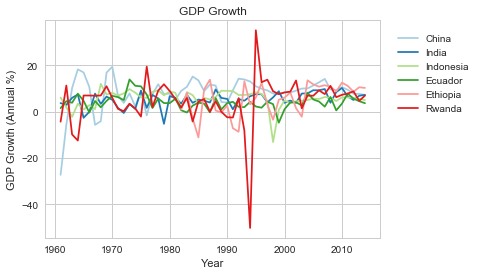

In [13]:
sns.set_style('whitegrid')
sns.set_palette("Paired")

fig = plt.figure()
plt.title('GDP Growth')
plt.xlabel('Year')
plt.ylabel('GDP Growth (Annual %)')

plt.plot(GDP_growth[GDP_growth['CountryName'] == 'China']["Year"], GDP_growth[GDP_growth['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(GDP_growth[GDP_growth['CountryName'] == 'India']["Year"], GDP_growth[GDP_growth['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(GDP_growth[GDP_growth['CountryName'] == 'Indonesia']["Year"], GDP_growth[GDP_growth['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(GDP_growth[GDP_growth['CountryName'] == 'Ecuador']["Year"], GDP_growth[GDP_growth['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(GDP_growth[GDP_growth['CountryName'] == 'Ethiopia']["Year"], GDP_growth[GDP_growth['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(GDP_growth[GDP_growth['CountryName'] == 'Rwanda']["Year"], GDP_growth[GDP_growth['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

As we can see, the annual growth rate of GDP appears to fluctuate over time due to natural variations in economic activity. However in recent times, the annual growth rates of GDP have generally been positive, signalling economic growth in these countries.

##### 3.1.2 GDP Per Capita Growth (Annual %)

GDP per capita is gross domestic product divided by midyear population. As with the annual percentage growth rate of GDP, the annual percentage growth rate of GDP per capita is also based on constant local currency.

This measure is especially useful when comparing one country to another, because it shows the relative performance of the countries.

In [14]:
GDPPC_growth = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'NY.GDP.PCAP.KD.ZG'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
GDPPC_growth = GDPPC_growth.sort_values(['CountryName', 'Year'], ascending=[1,0])

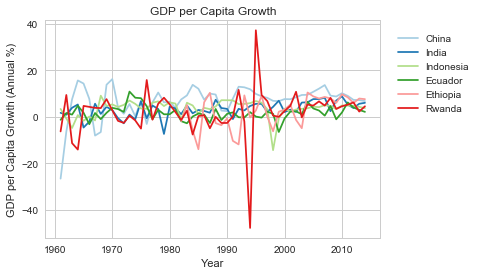

In [15]:
sns.set_style('whitegrid')
sns.set_palette("Paired")

fig = plt.figure()
plt.title('GDP per Capita Growth')
plt.xlabel('Year')
plt.ylabel('GDP per Capita Growth (Annual %)')

plt.plot(GDPPC_growth[GDPPC_growth['CountryName'] == 'China']["Year"], GDPPC_growth[GDPPC_growth['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(GDPPC_growth[GDPPC_growth['CountryName'] == 'India']["Year"], GDPPC_growth[GDPPC_growth['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(GDPPC_growth[GDPPC_growth['CountryName'] == 'Indonesia']["Year"], GDPPC_growth[GDPPC_growth['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(GDPPC_growth[GDPPC_growth['CountryName'] == 'Ecuador']["Year"], GDPPC_growth[GDPPC_growth['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(GDPPC_growth[GDPPC_growth['CountryName'] == 'Ethiopia']["Year"], GDPPC_growth[GDPPC_growth['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(GDPPC_growth[GDPPC_growth['CountryName'] == 'Rwanda']["Year"], GDPPC_growth[GDPPC_growth['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

##### 3.1.3 GDP Per Capita PPP (Purchasing Power Parity)

While the two indicators above do allow us to compare economic activity, consumption and production between the different countries, they do not take into account the differences in cost of living as the calculations are based on nominal estimates.

PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. As the PPP basis accounts for over and under-valuations in the exchange rate, it can be argued that GDP per capita PPP is a more useful measure of economic activity and standards of living across different countries.

In fact, we can observe that GDP per capita PPP has indeed been rising over time for our chosen countries.

In [16]:
GDPPC_PPP = pd.read_sql(""" SELECT IndicatorCode, CountryName, IndicatorName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'NY.GDP.PCAP.PP.KD'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
GDPPC_PPP = GDPPC_PPP.sort_values(['CountryName', 'Year'], ascending=[1,0])

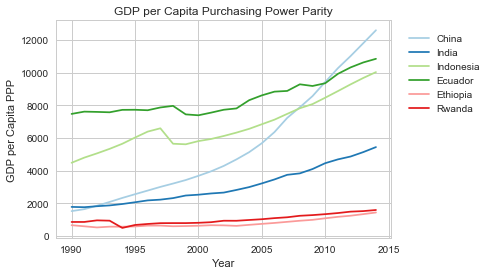

In [17]:
sns.set_style('whitegrid')
sns.set_palette("Paired")

fig = plt.figure()
plt.title('GDP per Capita Purchasing Power Parity')
plt.xlabel('Year')
plt.ylabel('GDP per Capita PPP')

plt.plot(GDPPC_PPP[GDPPC_PPP['CountryName'] == 'China']["Year"], GDPPC_PPP[GDPPC_PPP['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(GDPPC_PPP[GDPPC_PPP['CountryName'] == 'India']["Year"], GDPPC_PPP[GDPPC_PPP['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(GDPPC_PPP[GDPPC_PPP['CountryName'] == 'Indonesia']["Year"], GDPPC_PPP[GDPPC_PPP['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(GDPPC_PPP[GDPPC_PPP['CountryName'] == 'Ecuador']["Year"], GDPPC_PPP[GDPPC_PPP['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(GDPPC_PPP[GDPPC_PPP['CountryName'] == 'Ethiopia']["Year"], GDPPC_PPP[GDPPC_PPP['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(GDPPC_PPP[GDPPC_PPP['CountryName'] == 'Rwanda']["Year"], GDPPC_PPP[GDPPC_PPP['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

##### 3.1.4 Household Final Consumption Expenditure Growth (Annual %)

Household final consumption is the market value of all goods and services, including durable products purchased by households. It can be argued that consumer spending is the most important short run determinant of economic performance. 

The annual percentage growth of household final consumption expenditure is based on constant local currency. Overall, the annual growth rate of household final consumption expenditure also tends to fluctuate over time. 

In [18]:
HC = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'NE.CON.PRVT.KD.ZG'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
HC = HC.sort_values(['CountryName', 'Year'], ascending=[1,0])

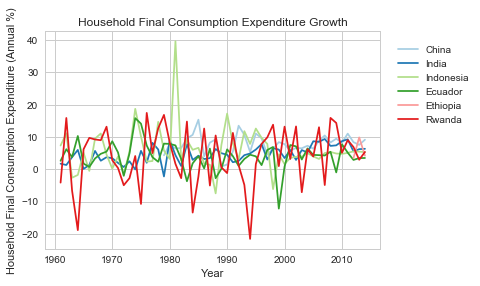

In [19]:
sns.set_style('whitegrid')
sns.set_palette("Paired")

fig = plt.figure()
plt.title('Household Final Consumption Expenditure Growth')
plt.xlabel('Year')
plt.ylabel('Household Final Consumption Expenditure (Annual %)')

plt.plot(HC[HC['CountryName'] == 'China']["Year"], HC[HC['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(HC[HC['CountryName'] == 'India']["Year"], HC[HC['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(HC[HC['CountryName'] == 'Indonesia']["Year"], HC[HC['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(HC[HC['CountryName'] == 'Ecuador']["Year"], HC[HC['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(HC[HC['CountryName'] == 'Ethiopia']["Year"], HC[HC['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(HC[HC['CountryName'] == 'Rwanda']["Year"], HC[HC['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

##### 3.1.5 GINI Index

The GINI index is a statistical measure used to represent the income or wealth distribution of a nation's citizens. It measures the extent to which the distribution of income among individuals or households within an economy deviates from a perfectly equal distribution. This is calculated by measuring the area between the Lorenz curve and a hypothetical line of absolute quality, expressed as a percentage of the maximum area under the line. A Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.

Interestingly, it appears that the positive trend in growth of GDP per capita PPP over time has not necessarily resulted in more equal distributions of income. Only in Ecuador and Ethiopia has the distribution of income become more equal over time.  

In [20]:
gini = pd.read_sql(""" SELECT IndicatorCode, CountryName, IndicatorName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'SI.POV.GINI'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
gini = gini.sort_values(['CountryName', 'Year'], ascending=[1,0])

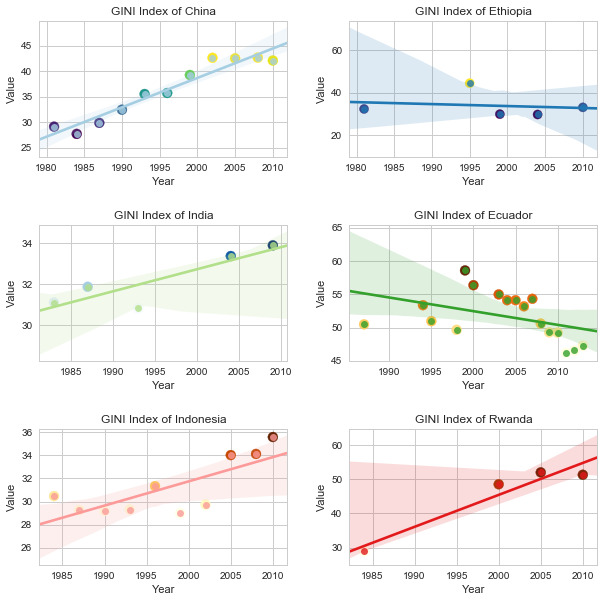

In [21]:
sns.set_style('whitegrid')
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10,10))

# Plot of GINI Index of China
points = ax1.scatter(gini[gini['CountryName'] == 'China']["Year"], gini[gini['CountryName'] == 'China']["Value"],
                    c=gini[gini['CountryName'] == 'China']["Value"], s=100, cmap="viridis")
sns.regplot("Year", "Value", data=gini[gini['CountryName'] == 'China'], ax=ax1)
ax1.set_title("GINI Index of China")

# Plot of GINI Index of Ethiopia
points = ax2.scatter(gini[gini['CountryName'] == 'Ethiopia']["Year"], gini[gini['CountryName'] == 'Ethiopia']["Value"],
                    c=gini[gini['CountryName'] == 'Ethiopia']["Value"], s=85, cmap="viridis")
sns.regplot("Year", "Value", data=gini[gini['CountryName'] == 'Ethiopia'], ax=ax2)
ax2.set_title("GINI Index of Ethiopia")

# Plot of GINI Index of India
points = ax3.scatter(gini[gini['CountryName'] == 'India']["Year"], gini[gini['CountryName'] == 'India']["Value"],
                    c=gini[gini['CountryName'] == 'India']["Value"], s=100, cmap="Blues")
sns.regplot("Year", "Value", data=gini[gini['CountryName'] == 'India'], ax=ax3)
ax3.set_title("GINI Index of India")


# Plot of GNI Index of Ecuador
point = ax4.scatter(gini[gini['CountryName'] == 'Ecuador']["Year"], gini[gini['CountryName'] == 'Ecuador']["Value"],
                   c=gini[gini['CountryName'] == 'Ecuador']["Value"], s=100, cmap="YlOrBr")
sns.regplot("Year", "Value", data=gini[gini['CountryName'] == 'Ecuador'], ax=ax4)
ax4.set_title("GINI Index of Ecuador")

# Plot of GNI Index of Indonesia
point = ax5.scatter(gini[gini['CountryName'] == 'Indonesia']["Year"], gini[gini['CountryName'] == 'Indonesia']["Value"],
                   c=gini[gini['CountryName'] == 'Indonesia']["Value"], s=100, cmap="YlOrBr")
sns.regplot("Year", "Value", data=gini[gini['CountryName'] == 'Indonesia'], ax=ax5)
ax5.set_title("GINI Index of Indonesia")

# Plot of GNI Index of Rwanda
point = ax6.scatter(gini[gini['CountryName'] == 'Rwanda']["Year"], gini[gini['CountryName'] == 'Rwanda']["Value"],
                   c=gini[gini['CountryName'] == 'Rwanda']["Value"], s=100, cmap="YlOrBr")
sns.regplot("Year", "Value", data=gini[gini['CountryName'] == 'Rwanda'], ax=ax6)
ax6.set_title("GINI Index of Rwanda")

plt.subplots_adjust(wspace=0.25, hspace=0.5)

##### 3.1.6 Income Distribution and Income Share

These trends can be affirmed by examining the share of income belonging to each quintile of the general population within each economy.

In China, the share of income held by the lowest quintile has been rapidly dropping over the years from roughly 8.86% in 1981 to 4.67% in 2010. We also see similar patterns for the second and third quintiles. The share of income belonging to the fourth quintile has remained roughly the same, while the share of income belonging to the highest quintile has actually increased by roughly 10% over the last 30 years. 

In [22]:
CHN_income_share = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode IN ('SI.DST.FRST.10', 'SI.DST.10TH.10', 'SI.DST.FRST.20', 
                'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20')
                AND CountryName = 'China'""", con=conn)

IND_income_share = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode IN ('SI.DST.FRST.10', 'SI.DST.10TH.10', 'SI.DST.FRST.20', 
                'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20')
                AND CountryName = 'India'""", con=conn)

IDN_income_share = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode IN ('SI.DST.FRST.10', 'SI.DST.10TH.10', 'SI.DST.FRST.20', 
                'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20')
                AND CountryName = 'Indonesia'""", con=conn)

ECU_income_share = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode IN ('SI.DST.FRST.10', 'SI.DST.10TH.10', 'SI.DST.FRST.20', 
                'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20')
                AND CountryName = 'Ecuador'""", con=conn)

ETH_income_share = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode IN ('SI.DST.FRST.10', 'SI.DST.10TH.10', 'SI.DST.FRST.20', 
                'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20')
                AND CountryName = 'Ethiopia'""", con=conn)

RWA_income_share = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode IN ('SI.DST.FRST.10', 'SI.DST.10TH.10', 'SI.DST.FRST.20', 
                'SI.DST.02ND.20', 'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20')
                AND CountryName = 'Rwanda'""", con=conn)

frames = [CHN_income_share, IND_income_share, IDN_income_share, ECU_income_share, ETH_income_share, RWA_income_share]
income_share = pd.concat(frames)

In [23]:
trace1 = go.Bar(
    x = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Year"],
    y = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Value"],
    name = 'Income Share Held By Lowest 20%',
    marker = dict(
        color='rgb(237,248,251)'
    )
)

trace2 = go.Bar(
    x = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Year"],
    y = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Value"],
    name = 'Income Share Held By Second 20%',
    marker = dict(
        color='rgb(178,226,226)'
    )
)

trace3 = go.Bar(
    x = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Year"],
    y = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Value"],
    name = 'Income Share Held By Third 20%',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace4 = go.Bar(
    x = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Year"],
    y = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Value"],
    name = 'Income Share Held By Fourth 20%',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace5 = go.Bar(
    x = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Year"],
    y = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Value"],
    name = 'Income Share Held By Highest 20%',
    marker = dict(
        color='rgb(0,109,44)'
    )    
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = 'Income Distribution (By Quintiles) - China',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [24]:
trace1 = go.Bar(
    x = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Year"],
    y = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Value"],
    name = 'Income Share Held By Lowest 10%'
)

trace2 = go.Bar(
    x = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Year"],
    y = CHN_income_share[CHN_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Value"],
    name = 'Income Share Held By Highest 10%',
    marker = dict(
        color='rgb(158,202,225)'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title = 'Income Distribution - China',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

Additionally, we observe similar trends in India, Indonesia and Rwanda, where the share of income belonging to each of the bottom four quintiles has decreased over time while the share of income belonging to the top quintile has increased.

In [25]:
trace1 = go.Bar(
    x = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Year"],
    y = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Value"],
    name = 'Income Share Held By Lowest 20%',
    marker = dict(
        color='rgb(237,248,251)'
    )
)

trace2 = go.Bar(
    x = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Year"],
    y = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Value"],
    name = 'Income Share Held By Second 20%',
    marker = dict(
        color='rgb(178,226,226)'
    )
)

trace3 = go.Bar(
    x = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Year"],
    y = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Value"],
    name = 'Income Share Held By Third 20%',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace4 = go.Bar(
    x = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Year"],
    y = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Value"],
    name = 'Income Share Held By Fourth 20%',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace5 = go.Bar(
    x = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Year"],
    y = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Value"],
    name = 'Income Share Held By Highest 20%',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = 'Income Distribution (By Quintiles) - India',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [26]:
trace1 = go.Bar(
    x = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Year"],
    y = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Value"],
    name = 'Income Share Held By Lowest 10%'
)

trace2 = go.Bar(
    x = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Year"],
    y = IND_income_share[IND_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Value"],
    name = 'Income Share Held By Highest 10%',
    marker = dict(
        color='rgb(158,202,225)'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title = 'Income Distribution - India',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [27]:
trace1 = go.Bar(
    x = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Year"],
    y = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Value"],
    name = 'Income Share Held By Lowest 20%',
    marker = dict(
        color='rgb(237,248,251)'
    )
)

trace2 = go.Bar(
    x = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Year"],
    y = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Value"],
    name = 'Income Share Held By Second 20%',
    marker = dict(
        color='rgb(178,226,226)'
    )
)

trace3 = go.Bar(
    x = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Year"],
    y = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Value"],
    name = 'Income Share Held By Third 20%',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace4 = go.Bar(
    x = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Year"],
    y = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Value"],
    name = 'Income Share Held By Fourth 20%',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace5 = go.Bar(
    x = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Year"],
    y = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Value"],
    name = 'Income Share Held By Highest 20%',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = 'Income Distribution (By Quintiles) - Indonesia',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [28]:
trace1 = go.Bar(
    x = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Year"],
    y = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Value"],
    name = 'Income Share Held By Lowest 10%'
)

trace2 = go.Bar(
    x = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Year"],
    y = IDN_income_share[IDN_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Value"],
    name = 'Income Share Held By Highest 10%',
    marker = dict(
        color='rgb(158,202,225)'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title = 'Income Distribution - Indonesia',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

It is only in Ecuador that these trends are reversed, while income share across the quintiles in Ethiopia has not varied greatly over the years.

In [29]:
trace1 = go.Bar(
    x = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Year"],
    y = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Value"],
    name = 'Income Share Held By Lowest 20%',
    marker = dict(
        color='rgb(237,248,251)'
    )
)

trace2 = go.Bar(
    x = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Year"],
    y = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Value"],
    name = 'Income Share Held By Second 20%',
    marker = dict(
        color='rgb(178,226,226)'
    )
)

trace3 = go.Bar(
    x = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Year"],
    y = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Value"],
    name = 'Income Share Held By Third 20%',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace4 = go.Bar(
    x = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Year"],
    y = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Value"],
    name = 'Income Share Held By Fourth 20%',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace5 = go.Bar(
    x = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Year"],
    y = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Value"],
    name = 'Income Share Held By Highest 20%',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = 'Income Distribution (By Quintiles) - Ecuador',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [30]:
trace1 = go.Bar(
    x = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Year"],
    y = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Value"],
    name = 'Income Share Held By Lowest 10%',
)

trace2 = go.Bar(
    x = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Year"],
    y = ECU_income_share[ECU_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Value"],
    name = 'Income Share Held By Highest 10%',
    marker = dict(
        color='rgb(158,202,225)'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title = 'Income Distribution - Ecuador',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [31]:
trace1 = go.Bar(
    x = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Year"],
    y = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Value"],
    name = 'Income Share Held By Lowest 20%',
    marker = dict(
        color='rgb(237,248,251)'
    )
)

trace2 = go.Bar(
    x = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Year"],
    y = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Value"],
    name = 'Income Share Held By Second 20%',
    marker = dict(
        color='rgb(178,226,226)'
    )
)

trace3 = go.Bar(
    x = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Year"],
    y = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Value"],
    name = 'Income Share Held By Third 20%',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace4 = go.Bar(
    x = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Year"],
    y = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Value"],
    name = 'Income Share Held By Fourth 20%',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace5 = go.Bar(
    x = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Year"],
    y = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Value"],
    name = 'Income Share Held By Highest 20%',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = 'Income Distribution (By Quintiles) - Ethiopia',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [32]:
trace1 = go.Bar(
    x = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Year"],
    y = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Value"],
    name = 'Income Share Held By Lowest 10%'
)

trace2 = go.Bar(
    x = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Year"],
    y = ETH_income_share[ETH_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Value"],
    name = 'Income Share Held By Highest 10%',
    marker = dict(
        color='rgb(158,202,225)'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title = 'Income Distribution - Ethiopia',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [33]:
trace1 = go.Bar(
    x = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Year"],
    y = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.FRST.20']["Value"],
    name = 'Income Share Held By Lowest 20%',
    marker = dict(
        color='rgb(237,248,251)'
    )
)

trace2 = go.Bar(
    x = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Year"],
    y = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.02ND.20']["Value"],
    name = 'Income Share Held By Second 20%',
    marker = dict(
        color='rgb(178,226,226)'
    )
)

trace3 = go.Bar(
    x = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Year"],
    y = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.03RD.20']["Value"],
    name = 'Income Share Held By Third 20%',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace4 = go.Bar(
    x = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Year"],
    y = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.04TH.20']["Value"],
    name = 'Income Share Held By Fourth 20%',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace5 = go.Bar(
    x = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Year"],
    y = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.05TH.20']["Value"],
    name = 'Income Share Held By Highest 20%',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = 'Income Distribution (By Quintiles) - Rwanda',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [34]:
trace1 = go.Bar(
    x = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Year"],
    y = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.FRST.10']["Value"],
    name = 'Income Share Held By Lowest 10%'
)

trace2 = go.Bar(
    x = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Year"],
    y = RWA_income_share[RWA_income_share['IndicatorCode'] == 'SI.DST.10TH.10']["Value"],
    name = 'Income Share Held By Highest 10%',
    marker = dict(
        color='rgb(158,202,225)'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title = 'Income Distribution - Rwanda',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

##### 3.1.6 Poverty Rates

The poverty headcount ratio at $\$$1.90 a day is the percentage of the population living on less than $\$$1.90 a day at 2011 international prices. The national poverty headcount ratio is the percentage of the population living below the national poverty lines. National estimates are based on population-weighted subgroup estimates from household surveys.

Overall, the descreasing trend in poverty rates across all chosen countries indicates progress in the alleviation of poverty. Although the distribution of income is not necessarily becoming more equitable, the combination of both increasing GDP per capita PPP quantities and decreasing poverty rates does indicate that the standard of living for the whole population is generally improving.

In [35]:
poverty_rate_190 = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'SI.POV.DDAY'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
poverty_rate_190 = poverty_rate_190.sort_values(['CountryName', 'Year'], ascending=[1,0])

poverty_rate_NPL = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'SI.POV.NAHC'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
poverty_rate_NPL = poverty_rate_NPL.sort_values(['CountryName', 'Year'], ascending=[1,0])

frames = [poverty_rate_190, poverty_rate_NPL]
poverty_rates = pd.concat(frames)

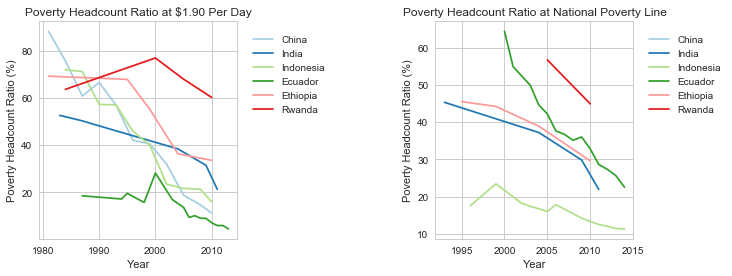

In [36]:
sns.set_style('whitegrid')
sns.set_palette("Paired")

plt.subplot(1, 2, 1)
plt.plot(poverty_rate_190[poverty_rate_190['CountryName'] == 'China']["Year"], poverty_rate_190[poverty_rate_190['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(poverty_rate_190[poverty_rate_190['CountryName'] == 'India']["Year"], poverty_rate_190[poverty_rate_190['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(poverty_rate_190[poverty_rate_190['CountryName'] == 'Indonesia']["Year"], poverty_rate_190[poverty_rate_190['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(poverty_rate_190[poverty_rate_190['CountryName'] == 'Ecuador']["Year"], poverty_rate_190[poverty_rate_190['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(poverty_rate_190[poverty_rate_190['CountryName'] == 'Ethiopia']["Year"], poverty_rate_190[poverty_rate_190['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(poverty_rate_190[poverty_rate_190['CountryName'] == 'Rwanda']["Year"], poverty_rate_190[poverty_rate_190['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.title('Poverty Headcount Ratio at $1.90 Per Day')
plt.xlabel('Year')
plt.ylabel('Poverty Headcount Ratio (%)')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

plt.subplot(1, 2, 2)
plt.plot(poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'China']["Year"], poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'India']["Year"], poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'Indonesia']["Year"], poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'Ecuador']["Year"], poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'Ethiopia']["Year"], poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'Rwanda']["Year"], poverty_rate_NPL[poverty_rate_NPL['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.title('Poverty Headcount Ratio at National Poverty Line')
plt.xlabel('Year')
plt.ylabel('Poverty Headcount Ratio (%)')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

plt.subplots_adjust(right = 1.5, wspace=1)

##### 3.1.7 Labour Force Structure

Unemployment and total employment are the broadest indicators of economic activity as reflected by the labour market.Employment is defined as persons of working age who were engaged in any activity to produce goods or services for pay or profit, whether at work during the reference period, or not at work due to temporary absence from a job, or to working-time arrangement.

1. The employment to population ratio is the proportion of a country's population that is employed. The working age population is considered to be all those individuals who are aged 15 years and older.
2. The labour force participation rate is the proportion of the population ages 15 and older that is economically active - that is, all people who supply labour for the production of goods and services during a specified period.
3. The unemployment rate refers to the share of the labour force that is without work, but available for and seeking employment.

While both the employment to population ratio and labour force participation rate has decreased over time for China, India and Rwanda, the unemployment rates for these countries have remained relatively stable over time. From this, we can deduce that both the employment to population ratio and the labour force participation rate are inversely related to the rate of unemployment.

In [37]:
lf_structure = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode IN ('SL.EMP.TOTL.SP.ZS', 'SL.TLF.CACT.ZS', 'SL.UEM.TOTL.ZS')
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
lf_structure = lf_structure.sort_values(['CountryName', 'Year'], ascending=[1,0])

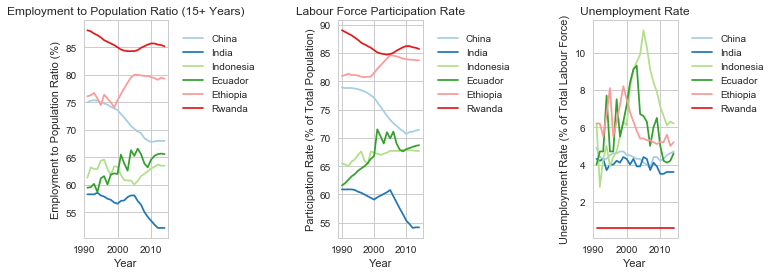

In [38]:
sns.set_palette("Paired")
sns.set_style('whitegrid')

plt.subplot(1, 3, 1)
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'China')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'China')]["Value"], label = 'China')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'India')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'India')]["Value"], label = 'India')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'Indonesia')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'Indonesia')]["Value"], label = 'Indonesia')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'Ecuador')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'Ecuador')]["Value"], label = 'Ecuador')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'Ethiopia')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'Ethiopia')]["Value"], label = 'Ethiopia')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'Rwanda')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.EMP.TOTL.SP.ZS') & (lf_structure['CountryName'] == 'Rwanda')]["Value"], label = 'Rwanda')
plt.title('Employment to Population Ratio (15+ Years)')
plt.xlabel('Year')
plt.ylabel('Employment to Population Ratio (%)')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

plt.subplot(1, 3, 2)
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'China')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'China')]["Value"], label = 'China')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'India')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'India')]["Value"], label = 'India')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'Indonesia')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'Indonesia')]["Value"], label = 'Indonesia')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'Ecuador')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'Ecuador')]["Value"], label = 'Ecuador')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'Ethiopia')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'Ethiopia')]["Value"], label = 'Ethiopia')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'Rwanda')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.TLF.CACT.ZS') & (lf_structure['CountryName'] == 'Rwanda')]["Value"], label = 'Rwanda')
plt.title('Labour Force Participation Rate')
plt.xlabel('Year')
plt.ylabel('Participation Rate (% of Total Population)')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

plt.subplot(1, 3, 3)
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'China')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'China')]["Value"], label = 'China')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'India')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'India')]["Value"], label = 'India')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'Indonesia')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'Indonesia')]["Value"], label = 'Indonesia')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'Ecuador')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'Ecuador')]["Value"], label = 'Ecuador')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'Ethiopia')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'Ethiopia')]["Value"], label = 'Ethiopia')
plt.plot(lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'Rwanda')]["Year"], lf_structure[(lf_structure['IndicatorCode'] == 'SL.UEM.TOTL.ZS') & (lf_structure['CountryName'] == 'Rwanda')]["Value"], label = 'Rwanda')
plt.title('Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (% of Total Labour Force)')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

plt.subplots_adjust(right = 1.5, wspace=2)

Despite the fact that these indicators are important in assessing the economic activity of a country, we must also take into account that there is often a component of the unemployment rate that represents cyclical unemployment - that is, changes in unemployment over time may reflect changes in the demand for and supply of labour. In addition to these indicators, we should also examine the proportion of each country's labour force within different sectors of the economy. 

##### 3.1.8 Employment By Industry Sector

1. The agriculture sector consists of activities in agriculture, hunting, forestry and fishing.
2. The industry sector consists of mining and quarrying, manufacturing, construction, and public utilities including electricity, gas and water.
3. The services sector consists of wholesale and retail trade and restaurants and hotels; transport, storage and communications; financing, insurance, real estate and business services; and community, social and personal services.

The more developed an economy is, the greater the shift towards a service-based economy.

In [39]:
empl_industry = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode IN ('SL.AGR.EMPL.ZS', 'SL.IND.EMPL.ZS', 'SL.SRV.EMPL.ZS')
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
empl_industry = empl_industry.sort_values(['CountryName', 'Year'], ascending=[1,0])

Indeed, we observe that for China, the concentration of employment has notably shifted away from the agriculture sector and towards the industry and services sectors. In the 1980s, the proportion of employment in the agriculture sector constituted roughly 60% of the working population, however by 2010, the proportion of those employed in agriculture was less than 5%, with the majority of employment now in industry and services. This trend was also evident in India, Indonesia and Rwanda across the last two to three decades, and in Ecuador over the last decade. We are not able to observe any notable trends in Ethiopia, where the distribution of employment across the three main sectors is still fluctuating over time.

In [40]:
trace1 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'China')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'China')]["Value"],
    name = 'Employment in Agriculture (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'China')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'China')]["Value"],
    name = 'Employment in Industry (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'China')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'China')]["Value"],
    name = 'Employment in Services (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Employment By Industry Sector (%) - China',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [41]:
trace1 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'India')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'India')]["Value"],
    name = 'Employment in Agriculture (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'India')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'India')]["Value"],
    name = 'Employment in Industry (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'India')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'India')]["Value"],
    name = 'Employment in Services (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Employment By Industry Sector (%) - India',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [42]:
trace1 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'Indonesia')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'Indonesia')]["Value"],
    name = 'Employment in Agriculture (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'Indonesia')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'Indonesia')]["Value"],
    name = 'Employment in Industry (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'Indonesia')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'Indonesia')]["Value"],
    name = 'Employment in Services (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Employment By Industry Sector (%) - Indonesia',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [43]:
trace1 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'Ecuador')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'Ecuador')]["Value"],
    name = 'Employment in Agriculture (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'Ecuador')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'Ecuador')]["Value"],
    name = 'Employment in Industry (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'Ecuador')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'Ecuador')]["Value"],
    name = 'Employment in Services (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Employment By Industry Sector (%) - Ecuador',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [44]:
trace1 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'Ethiopia')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'Ethiopia')]["Value"],
    name = 'Employment in Agriculture (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'Ethiopia')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'Ethiopia')]["Value"],
    name = 'Employment in Industry (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'Ethiopia')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'Ethiopia')]["Value"],
    name = 'Employment in Services (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Employment By Industry Sector (%) - Ethiopia',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [45]:
trace1 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'Rwanda')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.AGR.EMPL.ZS') & (empl_industry['CountryName'] == 'Rwanda')]["Value"],
    name = 'Employment in Agriculture (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'Rwanda')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.IND.EMPL.ZS') & (empl_industry['CountryName'] == 'Rwanda')]["Value"],
    name = 'Employment in Industry (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'Rwanda')]["Year"],
    y = empl_industry[(empl_industry['IndicatorCode'] == 'SL.SRV.EMPL.ZS') & (empl_industry['CountryName'] == 'Rwanda')]["Value"],
    name = 'Employment in Services (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Employment By Industry Sector (%) - Rwanda',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

#### 3.2 Exploring Trends in Education Quality and Outcomes Indicators

##### 3.2.1 Education Efficiency and Participation

1. The rate of persistence to the last grade of primary is the percentage of children enrolled in the first grade of primary school who eventually reach the last grade of primary education. 

2. The rate of progression to secondary school refers to the number of new entrants to the first grade of secondary school in a given year as a percentage of the number of students enrolled in the final grade of primary school in the previous year.

3. The gross enrolment ratio in tertiary education is the ratio of total enrolment, regardless of age, to the population of the age group that officially corresponds to this level of education. Tertiary education normally requires the successful completion of education at the secondary level as a minimum condition of admission. 

Across all the countries, we can see that the gross enrolment ratio in tertiary education has rapidly increased, backed by trends of generally increasing rates of persistence and progression in primary and secondary forms of education.

In [46]:
primary = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'SE.PRM.PRSL.ZS'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
primary = primary.sort_values(['CountryName', 'Year'], ascending=[1,0])

secondary = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'SE.SEC.PROG.ZS'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
secondary = secondary.sort_values(['CountryName', 'Year'], ascending=[1,0])

tertiary = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'SE.TER.ENRR'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
tertiary = tertiary.sort_values(['CountryName', 'Year'], ascending=[1,0])

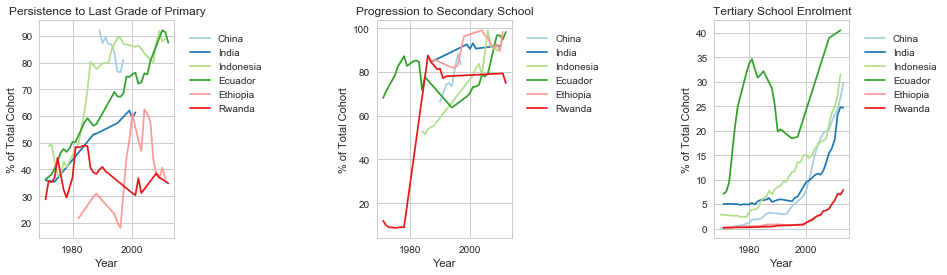

In [47]:
sns.set_style('whitegrid')
sns.set_palette("Paired")

plt.subplot(1, 3, 1)
plt.plot(primary[primary['CountryName'] == 'China']["Year"], primary[primary['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(primary[primary['CountryName'] == 'India']["Year"], primary[primary['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(primary[primary['CountryName'] == 'Indonesia']["Year"], primary[primary['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(primary[primary['CountryName'] == 'Ecuador']["Year"], primary[primary['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(primary[primary['CountryName'] == 'Ethiopia']["Year"], primary[primary['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(primary[primary['CountryName'] == 'Rwanda']["Year"], primary[primary['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.title('Persistence to Last Grade of Primary')
plt.xlabel('Year')
plt.ylabel('% of Total Cohort')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

plt.subplot(1, 3, 2)
plt.plot(secondary[secondary['CountryName'] == 'China']["Year"], secondary[secondary['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(secondary[secondary['CountryName'] == 'India']["Year"], secondary[secondary['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(secondary[secondary['CountryName'] == 'Indonesia']["Year"], secondary[secondary['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(secondary[secondary['CountryName'] == 'Ecuador']["Year"], secondary[secondary['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(secondary[secondary['CountryName'] == 'Ethiopia']["Year"], secondary[secondary['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(secondary[secondary['CountryName'] == 'Rwanda']["Year"], secondary[secondary['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.title('Progression to Secondary School')
plt.xlabel('Year')
plt.ylabel('% of Total Cohort')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

plt.subplot(1, 3, 3)
plt.plot(tertiary[tertiary['CountryName'] == 'China']["Year"], tertiary[tertiary['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(tertiary[tertiary['CountryName'] == 'India']["Year"], tertiary[tertiary['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(tertiary[tertiary['CountryName'] == 'Indonesia']["Year"], tertiary[tertiary['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(tertiary[tertiary['CountryName'] == 'Ecuador']["Year"], tertiary[tertiary['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(tertiary[tertiary['CountryName'] == 'Ethiopia']["Year"], tertiary[tertiary['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(tertiary[tertiary['CountryName'] == 'Rwanda']["Year"], tertiary[tertiary['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.title('Tertiary School Enrolment')
plt.xlabel('Year')
plt.ylabel('% of Total Cohort')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

plt.subplots_adjust(right = 2, wspace=1.5)

##### 3.2.2 Government Expenditure on Education

Expenditure on primary, secondary and tertiary education is expressed as a percentage of total general government expenditure on education. Overall, government expenditure on education has consistently comprised over 80% of government expenditure in all six countries. 

In [48]:
education_expenditure = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode IN ('SE.XPD.PRIM.ZS', 'SE.XPD.SECO.ZS', 'SE.XPD.TERT.ZS')
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
education_expenditure = education_expenditure.sort_values(['CountryName', 'Year'], ascending=[1,0])

In [49]:
trace1 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'China')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'China')]["Value"],
    name = 'Expenditure on Primary Education (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'China')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'China')]["Value"],
    name = 'Expenditure on Secondary Education (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'China')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'China')]["Value"],
    name = 'Expenditure on Tertiary Education (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Government Expenditure on Education - China',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [50]:
trace1 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'India')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'India')]["Value"],
    name = 'Expenditure on Primary Education (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'India')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'India')]["Value"],
    name = 'Expenditure on Secondary Education (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'India')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'India')]["Value"],
    name = 'Expenditure on Tertiary Education (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Government Expenditure on Education - India',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [51]:
trace1 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'Indonesia')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'Indonesia')]["Value"],
    name = 'Expenditure on Primary Education (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'Indonesia')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'Indonesia')]["Value"],
    name = 'Expenditure on Secondary Education (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'Indonesia')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'Indonesia')]["Value"],
    name = 'Expenditure on Tertiary Education (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Government Expenditure on Education - Indonesia',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [52]:
trace1 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'Ecuador')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'Ecuador')]["Value"],
    name = 'Expenditure on Primary Education (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'Ecuador')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'Ecuador')]["Value"],
    name = 'Expenditure on Secondary Education (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'Ecuador')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'Ecuador')]["Value"],
    name = 'Expenditure on Tertiary Education (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Government Expenditure on Education - Ecuador',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [53]:
trace1 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'Ethiopia')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'Ethiopia')]["Value"],
    name = 'Expenditure on Primary Education (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'Ethiopia')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'Ethiopia')]["Value"],
    name = 'Expenditure on Secondary Education (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'Ethiopia')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'Ethiopia')]["Value"],
    name = 'Expenditure on Tertiary Education (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Government Expenditure on Education - Ethiopia',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [54]:
trace1 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'Rwanda')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.PRIM.ZS') & (education_expenditure['CountryName'] == 'Rwanda')]["Value"],
    name = 'Expenditure on Primary Education (%)',
    marker = dict(
        color='rgb(102,194,164)'
    )
)

trace2 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'Rwanda')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.SECO.ZS') & (education_expenditure['CountryName'] == 'Rwanda')]["Value"],
    name = 'Expenditure on Secondary Education (%)',
    marker = dict(
        color='rgb(44,162,95)'
    )
)

trace3 = go.Bar(
    x = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'Rwanda')]["Year"],
    y = education_expenditure[(education_expenditure['IndicatorCode'] == 'SE.XPD.TERT.ZS') & (education_expenditure['CountryName'] == 'Rwanda')]["Value"],
    name = 'Expenditure on Tertiary Education (%)',
    marker = dict(
        color='rgb(0,109,44)'
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Government Expenditure on Education - Rwanda',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

##### 3.2.3 Quality of Educational Inputs

Trained teachers in primary education are the percentage of primary school teachers who have received the minimum organised teacher training required for service in their country.

Unfortunately, we do not have enough data to make a meaningful conclusion regarding this indicator. We only have statistics for Ecuador, Ethiopia and Rwanda.

In [55]:
trained_teachers = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'SE.PRM.TCAQ.ZS'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
trained_teachers = trained_teachers.sort_values(['CountryName', 'Year'], ascending=[1,0])

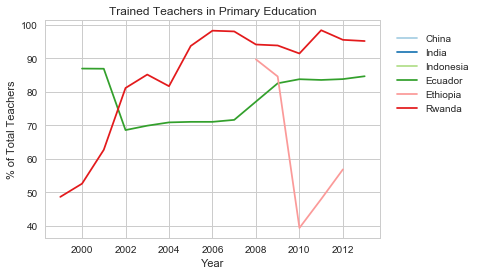

In [56]:
sns.set_style('whitegrid')
sns.set_palette("Paired")

fig = plt.figure()
plt.title('Trained Teachers in Primary Education')
plt.xlabel('Year')
plt.ylabel('% of Total Teachers')

plt.plot(trained_teachers[trained_teachers['CountryName'] == 'China']["Year"], trained_teachers[trained_teachers['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(trained_teachers[trained_teachers['CountryName'] == 'India']["Year"], trained_teachers[trained_teachers['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(trained_teachers[trained_teachers['CountryName'] == 'Indonesia']["Year"], trained_teachers[trained_teachers['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(trained_teachers[trained_teachers['CountryName'] == 'Ecuador']["Year"], trained_teachers[trained_teachers['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(trained_teachers[trained_teachers['CountryName'] == 'Ethiopia']["Year"], trained_teachers[trained_teachers['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(trained_teachers[trained_teachers['CountryName'] == 'Rwanda']["Year"], trained_teachers[trained_teachers['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

##### 3.2.4 Literacy Rates

The adult literacy rate is the percentage of people aged 15 and above who can both read and write and the youth literacy rate corresponds to the percentage of people aged 15-24. We can see that over the past three decades, both adult and youth literacy rates have increased in all six countries, with a greater percentage of youth contributing to the countries' literate population.

In [57]:
adult_literacy = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'SE.ADT.LITR.ZS'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
adult_literacy = adult_literacy.sort_values(['CountryName', 'Year'], ascending=[1,0])

youth_literacy = pd.read_sql(""" SELECT IndicatorCode, CountryName, Year, Value
                FROM Indicators
                WHERE IndicatorCode = 'SE.ADT.1524.LT.ZS'
                AND CountryName IN ('China', 'India', 'Indonesia', 'Ecuador', 'Rwanda',
                                    'Ethiopia')""", con=conn)
youth_literacy = youth_literacy.sort_values(['CountryName', 'Year'], ascending=[1,0])

frames = [adult_literacy, youth_literacy]
literacy_rates = pd.concat(frames)

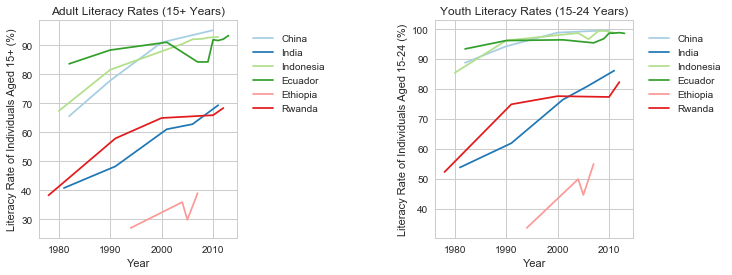

In [58]:
sns.set_palette("Paired")

plt.subplot(1, 2, 1)
plt.plot(adult_literacy[adult_literacy['CountryName'] == 'China']["Year"], adult_literacy[adult_literacy['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(adult_literacy[adult_literacy['CountryName'] == 'India']["Year"], adult_literacy[adult_literacy['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(adult_literacy[adult_literacy['CountryName'] == 'Indonesia']["Year"], adult_literacy[adult_literacy['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(adult_literacy[adult_literacy['CountryName'] == 'Ecuador']["Year"], adult_literacy[adult_literacy['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(adult_literacy[adult_literacy['CountryName'] == 'Ethiopia']["Year"], adult_literacy[adult_literacy['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(adult_literacy[adult_literacy['CountryName'] == 'Rwanda']["Year"], adult_literacy[adult_literacy['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.title('Adult Literacy Rates (15+ Years)')
plt.xlabel('Year')
plt.ylabel('Literacy Rate of Individuals Aged 15+ (%)')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

sns.set_palette("Paired")

plt.subplot(1, 2, 2)
plt.plot(youth_literacy[youth_literacy['CountryName'] == 'China']["Year"], youth_literacy[youth_literacy['CountryName'] == 'China']["Value"], label = 'China')
plt.plot(youth_literacy[youth_literacy['CountryName'] == 'India']["Year"], youth_literacy[youth_literacy['CountryName'] == 'India']["Value"], label = 'India')
plt.plot(youth_literacy[youth_literacy['CountryName'] == 'Indonesia']["Year"], youth_literacy[youth_literacy['CountryName'] == 'Indonesia']["Value"], label = 'Indonesia')
plt.plot(youth_literacy[youth_literacy['CountryName'] == 'Ecuador']["Year"], youth_literacy[youth_literacy['CountryName'] == 'Ecuador']["Value"], label = 'Ecuador')
plt.plot(youth_literacy[youth_literacy['CountryName'] == 'Ethiopia']["Year"], youth_literacy[youth_literacy['CountryName'] == 'Ethiopia']["Value"], label = 'Ethiopia')
plt.plot(youth_literacy[youth_literacy['CountryName'] == 'Rwanda']["Year"], youth_literacy[youth_literacy['CountryName'] == 'Rwanda']["Value"], label = 'Rwanda')
plt.title('Youth Literacy Rates (15-24 Years)')
plt.xlabel('Year')
plt.ylabel('Literacy Rate of Individuals Aged 15-24 (%)')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1.)

plt.subplots_adjust(right = 1.5, wspace=1)

#### 3.3 Correlation Between Economic Growth and Development & Education Quality and Outcomes

Generally speaking, there is a correlation between the economic growth and development of a country, and the quality of its education system, and progress in educational outcomes, as we observe that there have been significant improvements in all three areas over the past few decades. However, it cannot be said that it is only economic advances that fuel educational progress. In fact, it is likely that improvements in education also contribute towards a country's economic growth and development.

Improvements in gross domestic production over time have corresponded to higher incomes and standards of living, and enabled government expenditure on education facilities. This has resulted in the advancement of educational outcomes such as national literacy rates and empowered shifts towards higher-skilled jobs in the services industry.